In [111]:
import numpy as np
import pandas as pd
import os

## Predict whether a passenger survived or died in the Titanic disaster based on their attributes.

In [112]:
path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\data"
os.chdir(path)

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
rows, cols = df.shape
print(f"rows: {rows} columns: {cols}") 

rows: 891 columns: 12


In [114]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
# Categorical columbs
print(df['Survived'].value_counts(normalize=True))
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
print(df['Pclass'].value_counts())


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


* Missing Values: Age (177 missing), Cabin (687 missing), Embarked (2 missing).
* Data Types: Mix of numerical (int64, float64) and categorical (object) features.
* Key Columns: Survived (target), Pclass, Sex, Age, Fare.
* Pclass: Categorical (1, 2, 3)
* SibSp Meaning: Number of siblings or spouses aboard.Sibling = brother, sister, stepbrother, stepsister & Spouse = husband, wife (mistresses ignored)
* Parch Meaning: Number of parents or children aboard.Parent = mother, father & Child = son, daughter, stepchild
* Embarked:  Categorical (S, C, Q) Meaning: Port where the passenger boarded:S = Southampton (England),C = Cherbourg (France), Q = Queenstown (Ireland)
* Survived	✅ Target column	What we’re predicting.



# 2. Data Cleaning

In [119]:
#Checking the total sum of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [120]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


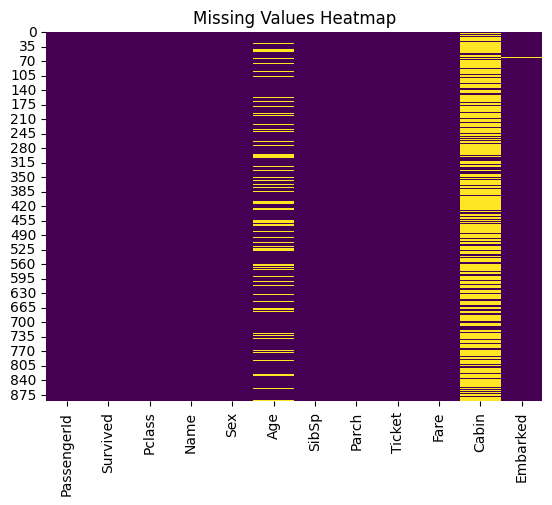

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

* Cabin has too many missing values (77%), so dropping it may be best.

* Age has ~20% missing, so imputation (median) is better.

* Embarked has only 2 missing rows, so we can fill with mode.

In [122]:
# Making a copy of the data so as to retain the original dataframe
df2 = df.copy()

In [123]:
# Imputing missing values with median for the 'Age' column
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

# Imputing 2 missing values in 'Embarked' with mode
df2['Embarked'] = df2['Embarked'].fillna(df2['Age'].mode()[0])

# Drop Cabin (too many missing values)
df2.drop('Cabin', axis=1, inplace=True)

In [124]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* We have imputed all missing values now our datais clean and contains no noise.

# 3. Exploratory Data Analysis

###  Overall Survival Rate

In [125]:
import plotly.express as px

fig = px.pie(df, names='Survived', title='Overall Survival Rate (0 = Died, 1 = Survived)',
             color='Survived', hole= 0.3, color_discrete_map={0: 'red', 1: 'brightgreen'})
fig.update_traces(textinfo='percent+label') 
fig.update_layout(
    width=600,
    height=400,
)
fig.show()

Only 38.4% survived (Meaning we have an imbalanced dataset).



### Categorical Features vs. Survival

In [126]:
fig = px.histogram(
    df2,
    x="Sex",
    color="Sex",
    title="Survival Rate by Sex",
    color_discrete_map={"male": "skyblue", "female": "salmon"},
    barmode="group"
)

# Update layout to mimic the original seaborn look
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Gender distribution",
    yaxis_title="Count",
    bargap=0.2
)

fig.show()


* 74.2% of females survived vs. 18.9% of males 

In [127]:
import plotly.express as px
import pandas as pd

# Calculate survival rate by class
survival_rate = (
    df2[df2['Survived'] == 1].groupby('Pclass').size() / df2.groupby('Pclass').size()
).reset_index(name='Survival Rate')

# Convert to percentage
survival_rate['Survival Rate'] *= 100

# Plotly bar chart
fig = px.bar(
    survival_rate,
    x='Pclass',
    y='Survival Rate',
    color='Pclass',
    title='Survival Rate by Class',
    text='Survival Rate',
    color_discrete_map={1: 'salmon', 2: 'gray', 3: 'skyblue'}
)

# Beautify layout
fig.update_layout(
    width=800,
    height=400,
    xaxis_title="Titanic Classes",
    yaxis_title="Survival Rate (%)",
    showlegend=False
)

# Format bar text
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.show()


In [128]:
import sys
print(sys.executable)

C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


* 1st class (63%) > 2nd class (47%) > 3rd class (24%) → Wealthier passengers had priority.

In [129]:
# Filter only survivors
survivors = df[df['Survived'] == 1]

# Count survivors by Embarked port
survivors_by_port = survivors['Embarked'].value_counts().reset_index()
survivors_by_port.columns = ['Embarked', 'Count']

# Plot
fig = px.bar(
    survivors_by_port,
    x='Embarked',
    y='Count',
    color='Embarked',
    title='Survivors by Embarkation Port',
    color_discrete_map={
        'C': '#8B0000',     # Dark red
        'Q': '#4682B4',     # Steel blue
        'S': '#2F4F4F'      # Dark slate gray
    }
)

fig.update_layout(
    width=800,
    height=400,
    xaxis_title='Embarked Port',
    yaxis_title='Number of Survivors',
    bargap=0.2,
    showlegend=False
)

fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()

* People who boarded from port (S), had the most survivors 217, unlike pople who boarded in port(Q) → Likely more 1st-class passengers boarded there.

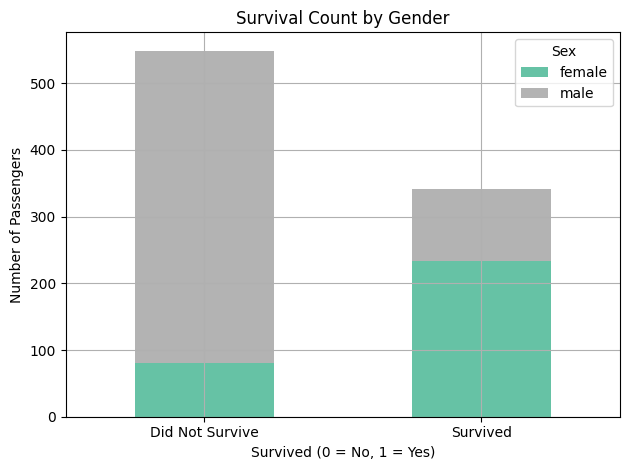

In [130]:
grouped = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, colormap='Set2')

# Formatting
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()


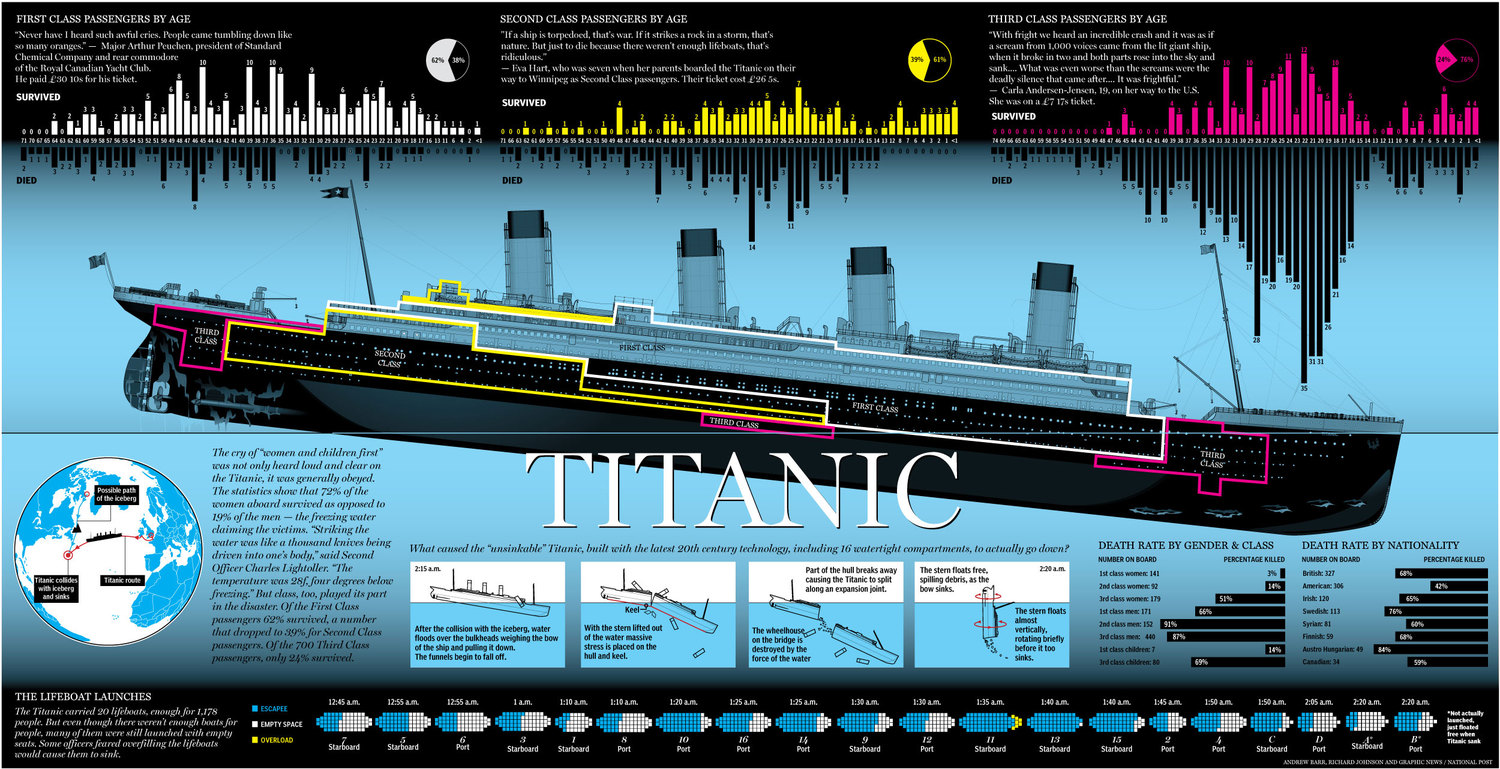

In [131]:
from IPython.display import Image


Image(filename="C:/Users/USER/Downloads/TItanic-Survival-Infographic.jpg")

In [132]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Data Preprocessing

In [133]:
# Extracting titles from names
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title
df2['Title'] = df2['Name'].apply(extract_title)
# Mapping titles to categories  
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare'
}       
df2['Title'] = df2['Title'].map(title_mapping).fillna('Rare')


In [134]:
df2['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [135]:
#creating family size column
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
# Creating a new column for family size categories
def family_size_category(size):
    if size == 1:
        return 'Single'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'  
df2['FamilySizeCategory'] = df2['FamilySize'].apply(family_size_category)

In [136]:
#age into categories
def age_category(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior' 
df2['AgeCategory'] = df2['Age'].apply(age_category)

In [137]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FamilySizeCategory,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,Small,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,Small,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,Single,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,Small,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,Single,Adult


In [138]:
#Lets drop the columns that we don't need anymore
df2.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [139]:
df2.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySizeCategory,AgeCategory
886,887,0,2,male,27.0,13.00,S,Rare,Single,Adult
887,888,1,1,female,19.0,30.00,S,Miss,Single,Adult
888,889,0,3,female,28.0,23.45,S,Miss,Small,Adult
889,890,1,1,male,26.0,30.00,C,Mr,Single,Adult
890,891,0,3,male,32.0,7.75,Q,Mr,Single,Adult


In [140]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df2['AgeCategory'] = label_encoder.fit_transform(df2['AgeCategory'])
df2['Sex'] = label_encoder.fit_transform(df2['Sex'])

In [141]:
# Dummy encoding embarked column
df2 = pd.get_dummies(df2, columns=['Embarked'], drop_first=True)

In [142]:
# Converting titles to numerical values using mapping
title_mapping = {
    'Mr': 0,
    'Miss': 1,
    'Mrs': 2,
    'Master': 3,
    'Rare': 4
}
df2['Title'] = df2['Title'].map(title_mapping)
# Converting FamilySizeCategory to numerical values using mapping
family_size_mapping = {
    'Single': 0,
    'Small': 1,
    'Large': 2
}                               
df2['FamilySizeCategory'] = df2['FamilySizeCategory'].map(family_size_mapping)
# Display the final DataFrame       
df2.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,FamilySizeCategory,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,0,1,0,False,False,True
1,2,1,1,0,38.0,71.2833,2,1,0,True,False,False
2,3,1,3,0,26.0,7.9250,1,0,0,False,False,True
3,4,1,1,0,35.0,53.1000,2,1,0,False,False,True
4,5,0,3,1,35.0,8.0500,0,0,0,False,False,True


In [143]:
df2[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df2[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)
# Display the final DataFrame with encoded columns
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,FamilySizeCategory,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,0,1,0,0,0,1
1,2,1,1,0,38.0,71.2833,2,1,0,1,0,0
2,3,1,3,0,26.0,7.9250,1,0,0,0,0,1
3,4,1,1,0,35.0,53.1000,2,1,0,0,0,1
4,5,0,3,1,35.0,8.0500,0,0,0,0,0,1


In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Sex                 891 non-null    int64  
 4   Age                 891 non-null    float64
 5   Fare                891 non-null    float64
 6   Title               891 non-null    int64  
 7   FamilySizeCategory  891 non-null    int64  
 8   AgeCategory         891 non-null    int64  
 9   Embarked_C          891 non-null    int64  
 10  Embarked_Q          891 non-null    int64  
 11  Embarked_S          891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [145]:
df2.set_index('PassengerId', inplace=True)


In [170]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Title',
       'FamilySizeCategory', 'AgeCategory', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

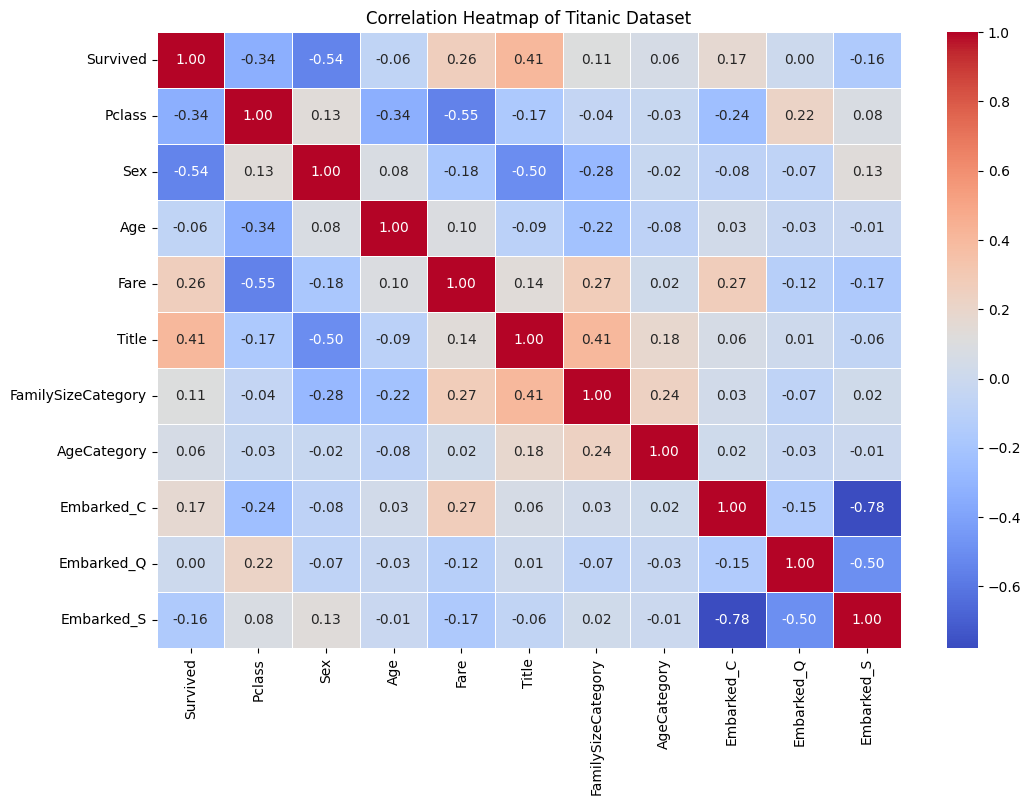

In [146]:
# Visualizing a heatmap of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [147]:
# correlation of features with the target variable 'Survived'
correlation = df2.corr()['Survived'].sort_values(ascending=False)
correlation

Survived              1.000000
Title                 0.407753
Fare                  0.257307
Embarked_C            0.168240
FamilySizeCategory    0.108631
AgeCategory           0.058859
Embarked_Q            0.003650
Age                  -0.064910
Embarked_S           -0.155660
Pclass               -0.338481
Sex                  -0.543351
Name: Survived, dtype: float64

# Model Training

In [148]:
# Splitting the dataset into features and target variable
X = df2.drop('Survived', axis=1)    
y = df2['Survived']
# Splitting the dataset into training and testing sets  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((579, 10), (312, 10), (579,), (312,))

In [150]:
# Fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=11, C=0.1, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=11, solver='liblinear')

In [151]:
#making predictions
y_pred = model.predict(X_test)

In [152]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
# calculating f1 score
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       188
           1       0.71      0.78      0.75       124

    accuracy                           0.79       312
   macro avg       0.78      0.79      0.78       312
weighted avg       0.79      0.79      0.79       312



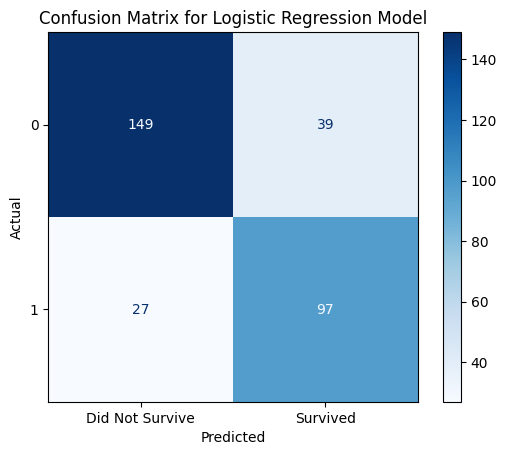

In [153]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_) 
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

In [154]:
#finding the most important features
importance = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
              Feature  Importance
4               Title    0.693356
7          Embarked_C    0.437540
6         AgeCategory    0.144892
8          Embarked_Q    0.137938
3                Fare    0.008810
2                 Age   -0.000099
9          Embarked_S   -0.009504
0              Pclass   -0.261638
5  FamilySizeCategory   -0.500246
1                 Sex   -1.211870


# RANDOM FOREST

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

#Defining the model
rf_model = RandomForestClassifier(random_state=11, class_weight='balanced')

#Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}
# Setting up the grid search
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, n_jobs=-1, 
    verbose=2
)
# Fitting the grid search
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
# Displaying the best score
print(f"Best Score from Grid Search: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters from Grid Search:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
Best Score from Grid Search: 0.8273


In [156]:
# Best model from grid search
best_rf_model = grid_search.best_estimator_

#evaluating the Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

In [169]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'FamilySizeCategory',
       'AgeCategory', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

# Evaluating Random Forest Model

Accuracy of Random Forest Model: 0.82
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       188
           1       0.78      0.78      0.78       124

    accuracy                           0.82       312
   macro avg       0.82      0.82      0.82       312
weighted avg       0.82      0.82      0.82       312



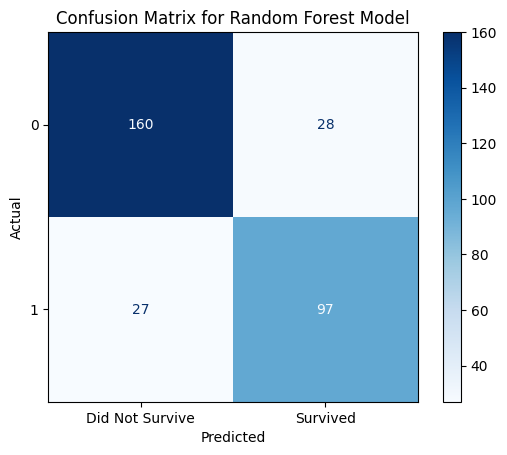

ROC AUC Score: 0.8800


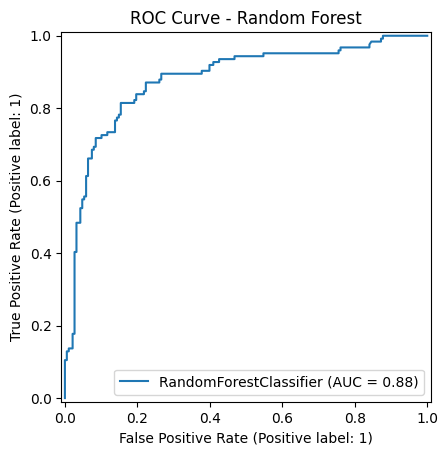

In [157]:
from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay
# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Model: {accuracy_rf:.2f}")
# Displaying the classification report for Random Forest model
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))
# Plotting the confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=grid_search.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

# ROC AUC Score (for binary classification)
if len(set(y_test)) == 2:
    y_prob_rf = grid_search.predict_proba(X_test)[:, 1]
    auc_rf = roc_auc_score(y_test, y_prob_rf)
    print(f"ROC AUC Score: {auc_rf:.4f}")

    RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
    plt.title('ROC Curve - Random Forest')
    plt.show()

The ROC curve shows an AUC of 0.88, indicating excellent classification performance. The curve trends steeply toward the top-left corner, demonstrating a high true positive rate with relatively few false positives. This suggests the model effectively differentiates between survivors and non-survivors.

# HYPERPARAMETER TUNING

# 1. Grid search

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid
param_grid = {
    'max_iter': [10, 100, 1000, 2000],
    'class_weight': ['balanced', None],
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'saga' supports l1 and l2
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=11),
    param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best results
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}\n")

# All results in a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns to display
results_display = results_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='rank_test_score')

# Print all results
print("All Grid Search Results:")
print(results_display.to_string(index=False))


Fitting 5 folds for each of 128 candidates, totalling 640 fits

Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8118

All Grid Search Results:
                                                                                           params  mean_test_score  std_test_score  rank_test_score
         {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}         0.811799        0.042167                1
        {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}         0.811799        0.042167                1
        {'C': 10, 'class_weight': None, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}         0.811799        0.042167                1
         {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}         0.811784        0.040416                4
        {'C': 10, 'class_wei

Best Model Accuracy: 0.80
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       188
           1       0.75      0.74      0.74       124

    accuracy                           0.80       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.80      0.80      0.80       312



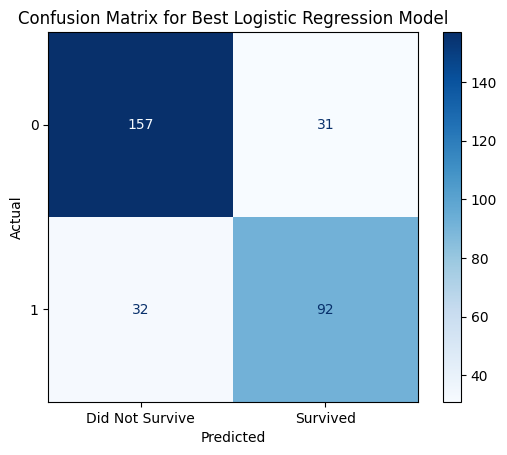

In [159]:
# evaluate the grid search best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy:.2f}")

# classification report for the best model
from sklearn.metrics import classification_report
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_model.classes_)
disp_best.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

# 2. Random Search

In [160]:
# Random Search for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_dist = {
    'max_iter': [10, 100, 1000, 2000],
    'class_weight': ['balanced', None],
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Added 'saga' for l1 penalty
}
# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(random_state=11),
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of parameter settings to sample
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)  # Use all available cores
# Fit the model
random_search.fit(X_train, y_train)
# Get the best parameters and best score
best_random_params = random_search.best_params_
best_random_score = random_search.best_score_
print(f"Best Random Search Parameters: {best_random_params}")
print(f"Best Random Search Cross-Validation Score: {best_random_score:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Search Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 10}
Best Random Search Cross-Validation Score: 0.8118


Best Random Search Model Accuracy: 0.80
Best Random Search Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       188
           1       0.75      0.74      0.74       124

    accuracy                           0.80       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.80      0.80      0.80       312



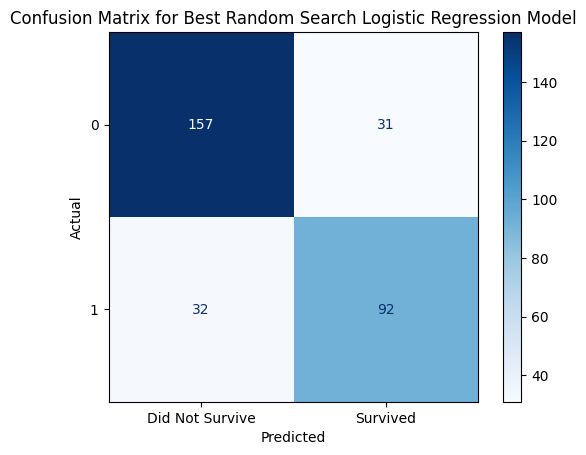

In [161]:
# evaluating the random search best model on the test set
best_random_model = random_search.best_estimator_
y_random_pred = best_random_model.predict(X_test)

# Evaluate the best random search model
best_random_accuracy = accuracy_score(y_test, y_random_pred)
print(f"Best Random Search Model Accuracy: {best_random_accuracy:.2f}")

# classification report for the best random search model
from sklearn.metrics import classification_report
print("Best Random Search Model Classification Report:\n", classification_report(y_test, y_random_pred))
# Confusion Matrix for the best random search model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_random_best = confusion_matrix(y_test, y_random_pred)
disp_random_best = ConfusionMatrixDisplay(confusion_matrix=cm_random_best, display_labels=best_random_model.classes_)
disp_random_best.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Best Random Search Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()


# Model Deployment

In [ ]:
import pickle
import os

# Correct: Full file path, including file name
model_path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\best_rf_model.pkl"

# Save the model
with open(model_path, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model saved at: {model_path}")


Model saved at: C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\best_rf_model.pkl


In [167]:
!pip install streamlit

     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     --------------------------- ------------ 30.7/44.3 kB 1.4 MB/s eta 0:00:01
     ----------------------------------- -- 41.0/44.3 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 44.3/44.3 kB 218.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
    --------------------------------------- 0.2/10.1 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.1 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.1 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/10.1 MB 2.0 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.1 MB 2.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/10.1 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/10.1 MB 3.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.6/10.1 MB 4.5 MB/s eta 0:00:02
  


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
